# Project 2: part3

## Import libraries

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt
from simulate import Simulation
from models.activity import ActivityRecorder, NetActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum, SinCurrent
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution

# Part3:

In [2]:
net = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),
                                    )
ng_exc = net.add_neuron_group(
    tag="ng_exc",
    size=800,
    behavior={
        1: SetCurrent(0.0),
        2: NoisyCurrent(iterations=1001,
                        mean=7,
                        std=1,
                        noise_type="white",
                        seed=1),
        3: CurrentSum(),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc_event")
    }
)
ng_inh = net.add_neuron_group(
    tag="ng_inh",
    size=200,
    behavior={
        1: SetCurrent(0.0),
        2: NoisyCurrent(iterations=1001,
                        mean=7,
                        std=2,
                        noise_type="white",
                        seed=1),

        3: CurrentSum(),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-35,
            R=5,
            u_init="normal(-60,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
syn_exc = net.add_synapse_group(
                   tag="exc-exc",
                   src=ng_exc,
                   dst=ng_exc,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=100, n=50, variance=0.75, alpha=0.9)})
syn_inh = net.add_synapse_group(
                   tag="inh-inh",
                   src=ng_inh,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})
syn_exc_inh = net.add_synapse_group(
                   tag="exc-inh",
                   src=ng_exc,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=200, n=50, variance=0.45, alpha=0.9)})
syn_inh_exc = net.add_synapse_group(
                   tag="inh-exc",
                   src=ng_inh,
                   dst=ng_exc,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-80, n=50, variance=0.45, alpha=0.9)})
net.simulate(iterations=200)

Network['Network_1', 'Network'](Neurons: tensor(1000)|2 groups, Synapses: tensor(1000000)|4 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc', 'SimulateNeuronGroup', 'ng'](800){1:SetCurrent(arg_0=0.0,)2:NoisyCurrent(iterations=1001,mean=7,std=1,noise_type=white,seed=1,)3:CurrentSum()6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-32,R=5,u_init=normal(-60,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc_event,)}
NeuronGroup['ng_inh', 'SimulateNeuronGroup', 'ng'](200){1:SetCurrent(arg_0=0.0,)2:NoisyCurrent(iterations=1001,mean=7,std=2,noise_type=white,seed=1,)3:CurrentSum()6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-35,R=5,u_init=normal(-60,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_in

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


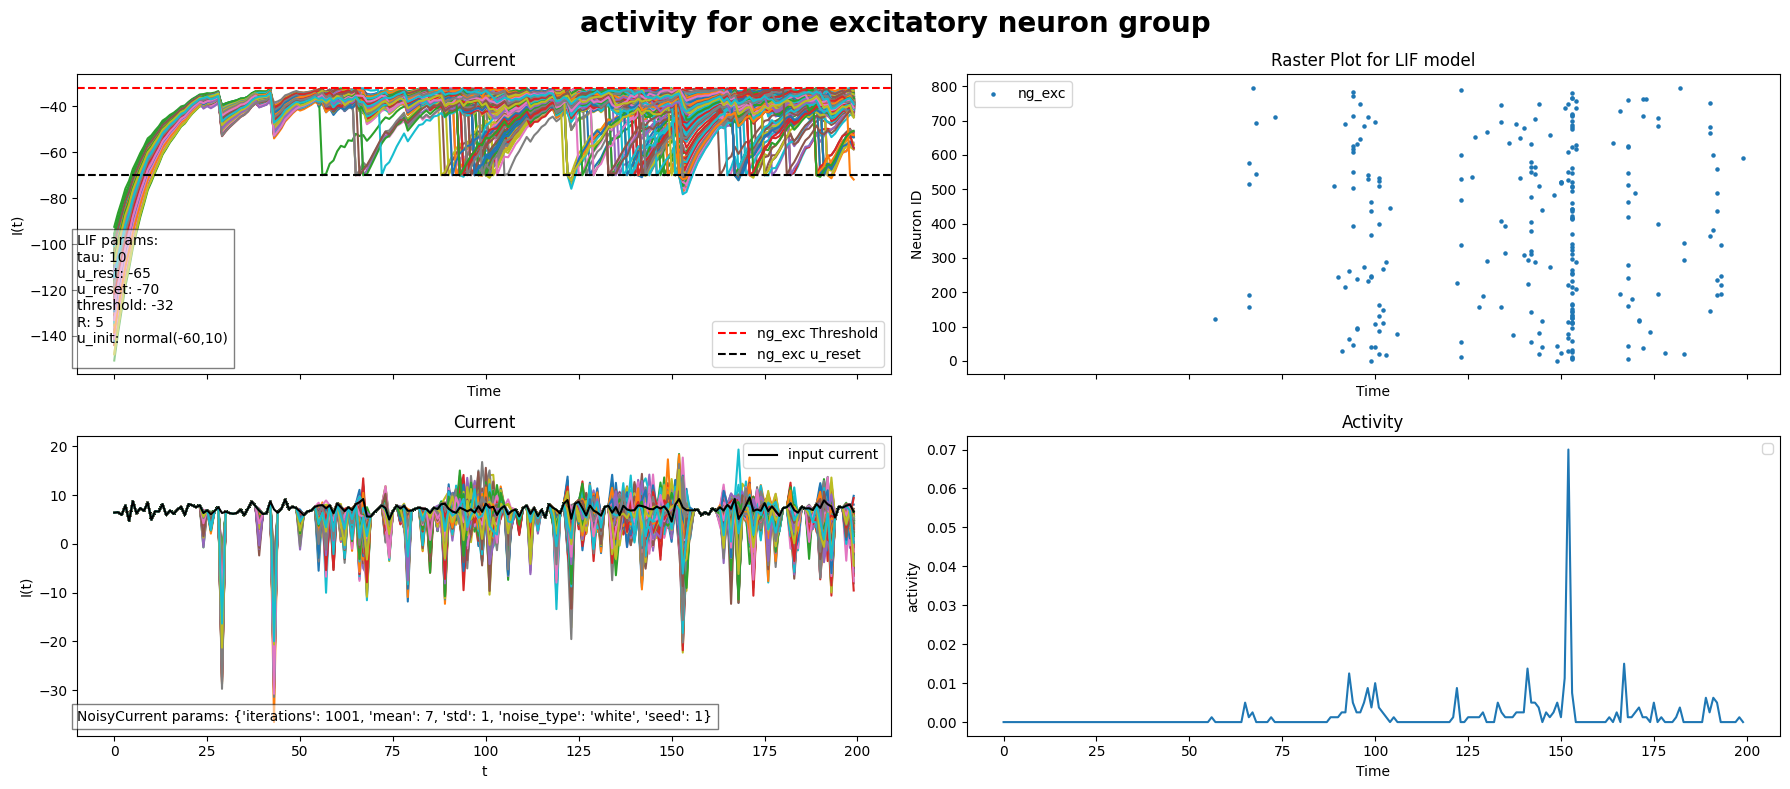

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc.add_current_plot(axs[1, 0], current_idx=2)
ng_exc.add_raster_plot(axs[0, 1])
ng_exc.add_activity_plot(axs[1, 1])
fig.suptitle("activity for one excitatory neuron group", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


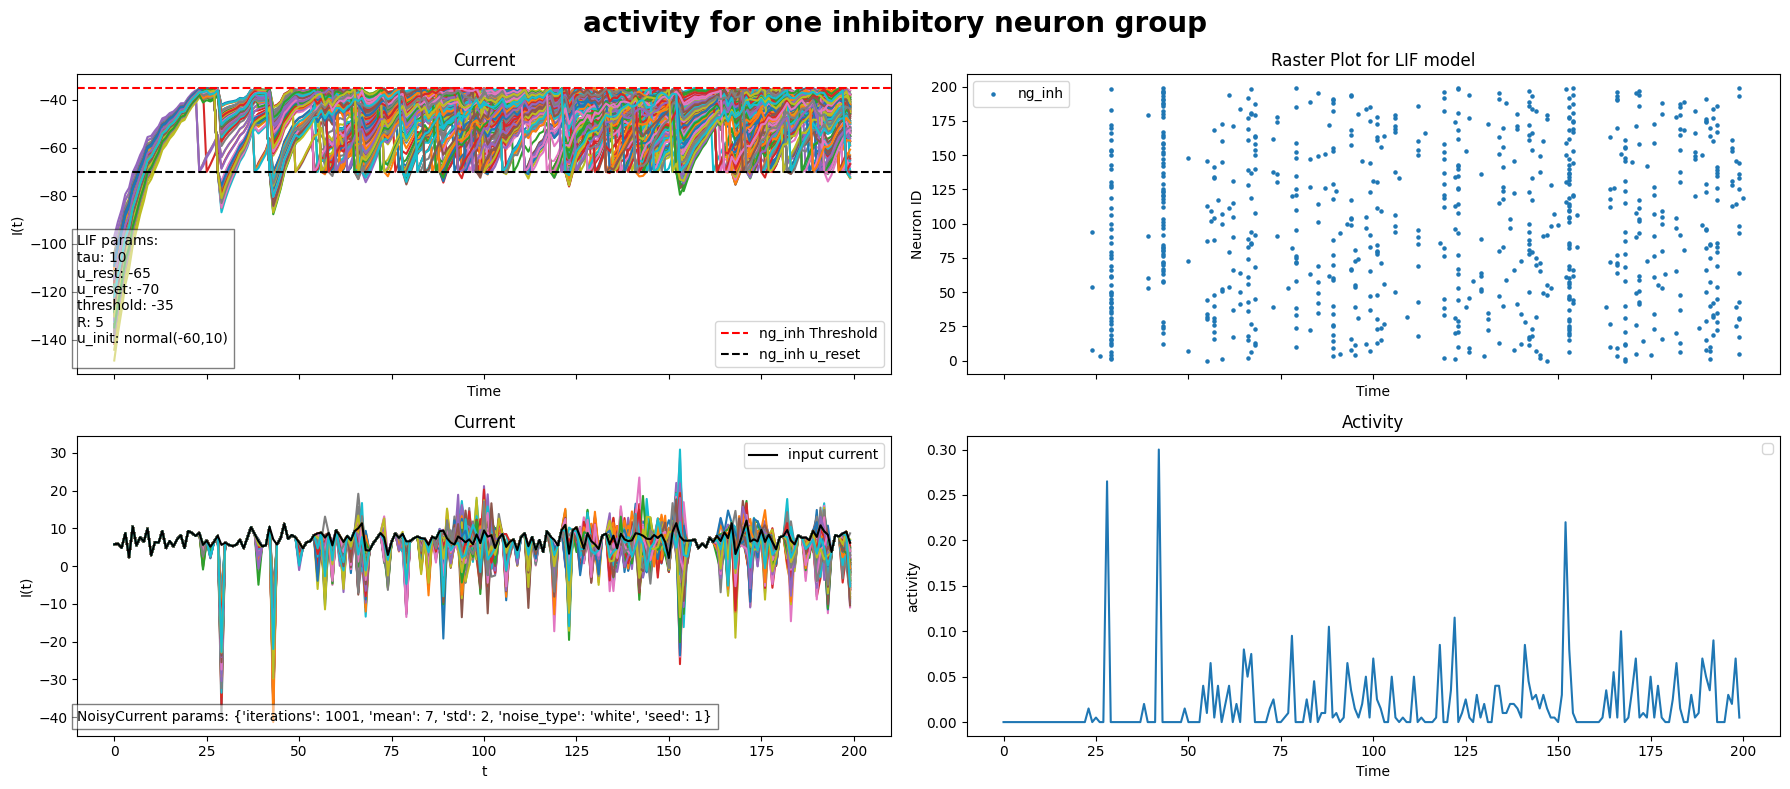

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_inh.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_inh.add_current_plot(axs[1, 0], current_idx=2)
ng_inh.add_raster_plot(axs[0, 1])
ng_inh.add_activity_plot(axs[1, 1])
fig.suptitle("activity for one inhibitory neuron group", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [5]:
ng_exc.network[f"ng_exc_rec", 0].variables["activity"].size()

torch.Size([200])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


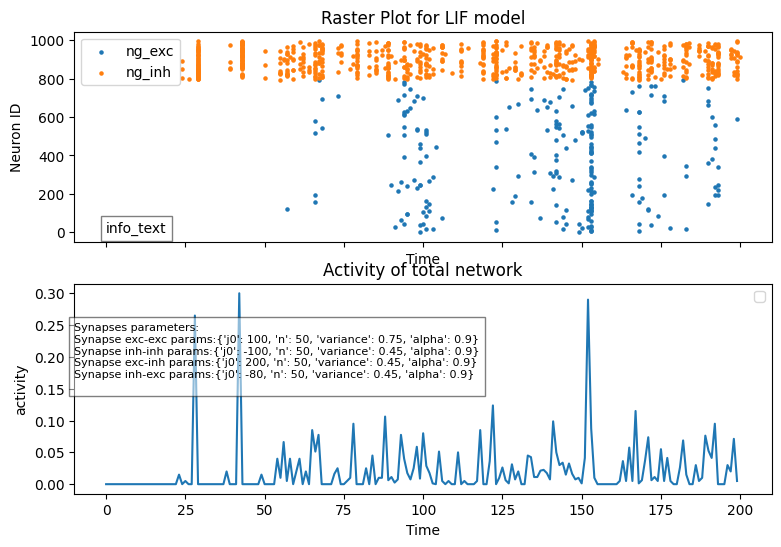

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
net.add_raster_plot(axs[0])
net.add_activity_plot(axs[1])
axs[0].text(0, 0, "info_text", bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [7]:
ng_exc.behavior[5].__class__.__name__

KeyError: 5